In [6]:
import CaboCha
fname = 'src/ai.ja.txt'
fname_parsed = 'src/ai.ja.cabocha'
with open(fname) as data_file, \
      open(fname_parsed, mode='w') as out_file:

    cabocha = CaboCha.Parser()
    for line in data_file:
        out_file.write(
            cabocha.parse(line).toString(CaboCha.FORMAT_LATTICE)
        )

In [7]:
import re
from collections import defaultdict

### 40

In [8]:
class Morph:    
    def __init__(self,params=None):
        if params is None:
            self.surface=""
            self.base=""
            self.pos=""
            self.pos1=""
        else:
            self.surface=params["surface"]
            self.base=params["base"]
            self.pos=params["pos"]
            self.pos1=params["pos1"]
    def __str__(self):
        return f"{self.surface:　<6} {self.base:　<6} {self.pos:　<6} {self.pos1:　<13}"

In [9]:
import MeCab

with open(fname,encoding="utf-8") as f:
    article=f.read()
m = MeCab.Tagger ()
aiMecab=m.parse (article)

pattern=re.compile(r"^(.*?)\t(.*?),(.*?)(?:,.*?){4},(.*?)(?:,.*?)*\n",re.MULTILINE + re.DOTALL)

aiPattern=pattern.findall(aiMecab)
article=[]
sentence=[]
for np in aiPattern:
#     if np[2]=="空白":
#         continue
    term={"surface":np[0],
          "base":np[3],
          "pos":np[1],
          "pos1":np[2],
         }
    morph=Morph(term)
    sentence.append(morph)
    if np[2]=="句点":
        article.append(sentence)
        sentence=[]
for sentence in article[:3]:
    for morph in sentence:
        print(morph)
    print()

人工　　　　 人工　　　　 名詞　　　　 一般　　　　　　　　　　　
知能　　　　 知能　　　　 名詞　　　　 一般　　　　　　　　　　　
人工　　　　 人工　　　　 名詞　　　　 一般　　　　　　　　　　　
知能　　　　 知能　　　　 名詞　　　　 一般　　　　　　　　　　　
（　　　　　 （　　　　　 記号　　　　 括弧開　　　　　　　　　　
じん　　　　 じん　　　　 名詞　　　　 一般　　　　　　　　　　　
こうち　　　 こうち　　　 名詞　　　　 一般　　　　　　　　　　　
のう　　　　 のう　　　　 助詞　　　　 終助詞　　　　　　　　　　
、　　　　　 、　　　　　 記号　　　　 読点　　　　　　　　　　　
AI　　　　 *　　　　　 名詞　　　　 一般　　　　　　　　　　　
〈　　　　　 〈　　　　　 記号　　　　 括弧開　　　　　　　　　　
エーアイ　　 *　　　　　 名詞　　　　 固有名詞　　　　　　　　　
〉　　　　　 〉　　　　　 記号　　　　 括弧閉　　　　　　　　　　
）　　　　　 ）　　　　　 記号　　　　 括弧閉　　　　　　　　　　
と　　　　　 と　　　　　 助詞　　　　 格助詞　　　　　　　　　　
は　　　　　 は　　　　　 助詞　　　　 係助詞　　　　　　　　　　
、　　　　　 、　　　　　 記号　　　　 読点　　　　　　　　　　　
「　　　　　 「　　　　　 記号　　　　 括弧開　　　　　　　　　　
『　　　　　 『　　　　　 記号　　　　 括弧開　　　　　　　　　　
計算　　　　 計算　　　　 名詞　　　　 サ変接続　　　　　　　　　
（　　　　　 （　　　　　 記号　　　　 括弧開　　　　　　　　　　
）　　　　　 ）　　　　　 記号　　　　 括弧閉　　　　　　　　　　
』　　　　　 』　　　　　 記号　　　　 括弧閉　　　　　　　　　　
という　　　 という　　　 助詞　　　　 格助詞　　　　　　　　　　
概念　　　　 概念　　　　 名詞　　　　 一般　　　　　　　　　　　
と　　　　　 と　　　　　 助詞　　　　 並立助詞　　　　　　　　　
『　　　　　 『　　　　　 記号　　　　 括弧開　　　　　　　　　　
コンピュータ コンピュータ 名詞　　　　 一般　　　　　　　　　　　
（　　　　　 （　　　　　 記号　　　　

### 41

In [10]:
with open(fname_parsed) as f:
    aitxt=f.read()

In [42]:
class Chunk:
    def __init__(self,params):
        self.morphs=params["morphs"]
        self.dst=params["dst"]
        self.srcs=params["srcs"]
    def __str__(self):
        l=f"{self.dst} {self.srcs}\n"
        for morph in self.morphs:
            l+=f"{morph}\n"
        return l
    def strMorphs(self):
        l=""
        for morph in self.morphs:
            if morph.pos != "記号":
                l+=morph.surface
        return l
    def hasPos(self,part):
        return part in [morph.pos for morph in self.morphs]

In [57]:
from collections import defaultdict
aiCaboCha=aitxt
article=[]
for sentence in aiCaboCha.split(sep="EOS\n"):
    if sentence == "":
        continue
    chunkPattern=re.compile(r"^\* (.+?) (.+?)D (?:.+?) (?:.+?)\n(.+?)(?=\n\* |\n$)",re.MULTILINE + re.DOTALL)
    aiChunks=chunkPattern.findall(sentence)

    srcs = defaultdict(list)
    dst=[]
    morphsets=[]
    for chunk in aiChunks:
        dst.append(int(chunk[1]))
        srcs[int(chunk[1])].append(int(chunk[0]))
        morphPattern=re.compile(r"^(.*?)\t(.*?),(.*?)(?:,.*?){4},(.*?)(?:,.*?)*$",re.MULTILINE + re.DOTALL)
        aimorphs=morphPattern.findall(chunk[2])
        morphs=[]
        for np in aimorphs:
            term={"surface":np[0],
                  "base":np[3],
                  "pos":np[1],
                  "pos1":np[2],
                 }
            morph=Morph(term)
            morphs.append(morph)
        morphsets.append(morphs)
    if -1 in srcs:
        del(srcs[-1])
    aisentence=[]
    for i in range(len(dst)):
        aisentence.append(Chunk({"srcs":dict(srcs)[i] if i in srcs else [],"dst":dst[i],"morphs":morphsets[i]}))
    if aisentence!= []:
        article.append(aisentence)
article_=article[:5]
for sentence in article_:
    for i,chunk in enumerate(sentence):
        print(f"[{i}]",chunk)

[0] -1 []
人工　　　　 人工　　　　 名詞　　　　 一般　　　　　　　　　　　
知能　　　　 知能　　　　 名詞　　　　 一般　　　　　　　　　　　

[0] 17 []
人工　　　　 人工　　　　 名詞　　　　 一般　　　　　　　　　　　
知能　　　　 知能　　　　 名詞　　　　 一般　　　　　　　　　　　

[1] 17 []
（　　　　　 （　　　　　 記号　　　　 括弧開　　　　　　　　　　
じん　　　　 じん　　　　 名詞　　　　 一般　　　　　　　　　　　
こうち　　　 こうち　　　 名詞　　　　 一般　　　　　　　　　　　
のう　　　　 のう　　　　 助詞　　　　 終助詞　　　　　　　　　　
、　　　　　 、　　　　　 記号　　　　 読点　　　　　　　　　　　

[2] 3 []
AI　　　　 *　　　　　 名詞　　　　 一般　　　　　　　　　　　

[3] 17 [2]
〈　　　　　 〈　　　　　 記号　　　　 括弧開　　　　　　　　　　
エーアイ　　 *　　　　　 名詞　　　　 固有名詞　　　　　　　　　
〉　　　　　 〉　　　　　 記号　　　　 括弧閉　　　　　　　　　　
）　　　　　 ）　　　　　 記号　　　　 括弧閉　　　　　　　　　　
と　　　　　 と　　　　　 助詞　　　　 格助詞　　　　　　　　　　
は　　　　　 は　　　　　 助詞　　　　 係助詞　　　　　　　　　　
、　　　　　 、　　　　　 記号　　　　 読点　　　　　　　　　　　

[4] 5 []
「　　　　　 「　　　　　 記号　　　　 括弧開　　　　　　　　　　
『　　　　　 『　　　　　 記号　　　　 括弧開　　　　　　　　　　
計算　　　　 計算　　　　 名詞　　　　 サ変接続　　　　　　　　　

[5] 9 [4]
（　　　　　 （　　　　　 記号　　　　 括弧開　　　　　　　　　　
）　　　　　 ）　　　　　 記号　　　　 括弧閉　　　　　　　　　　
』　　　　　 』　　　　　 記号　　　　 括弧閉　　　　　　　　　　
という　　　 という　　　 助詞　　　　 格助詞　　　　　　　　　　

[6] 9 []
概念　　　　 概念　　　　 名詞　　　　 一般　　　　　　　　　　　
と　　　　　 と　　　　　 助詞　　　　 並立助詞　　　　　　　　　

[7] 

### 42

In [13]:
def charchunk(chunk):
    l=""
    for morph in chunk.morphs:
        if morph.pos != "記号":
            l+=morph.surface
    return l

In [14]:
article_=article[:5]
for idx,chunks in enumerate(article_):
    for i,j in enumerate([chunk.dst for chunk in chunks]):
        if chunks[i].morphs[0].pos == "記号" and len(chunks[i].morphs)==1 :
            continue
        elif chunks[i].dst== -1:
            continue
        print(f"{charchunk(chunks[i])}\t{charchunk(chunks[j])}")

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される
日本大百科全書(ニッポニカ)』の	解説で
解説で	述べている
情報工学者通信工学者の	佐藤理史は
佐藤理史は	述べている
次のように	述べている
人間の	知的能力を
知的能力を	実現する
コンピュータ上で	実現する
実現する	技術ソフトウェアコンピュータシステム
様々な	技術ソフトウェアコンピュータシステム
技術ソフトウェアコンピュータシステム	ある
応用例は	ある
自然言語処理	機械翻訳かな漢字変換構文解析等
機械翻訳かな漢字変換構文解析等	専門家の
専門家の	推論判断を
推論判断を	模倣する
模倣する	エキスパートシステム
エキスパートシステム	画像認識等が
画像データを	解析して
解析して	検出抽出したりする
特定の	パターンを
パターンを	検出抽出したりする
検出抽出したりする	画像認識等が
画像認識等が	ある
ある	命名された
1956年に	命名された
ダートマス会議で	命名された
ジョンマッカーシーにより	命名された
命名された	使われている
現在では	使われている
記号処理を	用いた
用いた	知能の
知能の	記述を
記述を	する
主体と	する
する	研究での
情報処理や	研究での
研究での	アプローチという
アプローチという	意味あいでも
意味あいでも	使われている
使われている	ある
家庭用電気機械器具の	制御システムや
制御システムや	思考ルーチンも
ゲームソフトの	思考ルーチンも
思考ルーチンも	呼ばれる
こう	呼ばれる
呼ばれる	ことも


### 43

In [15]:
article_=article[:5]
for idx,chunks in enumerate(article_):
    for i,j in enumerate([chunk.dst for chunk in chunks]):
        if chunks[i].morphs[0].pos == "記号" and len(chunks[i].morphs)==1 :
            continue
        elif chunks[i].dst== -1:
            continue
        if "名詞" in [chunk.pos for chunk in chunks[i].morphs]  and "動詞" in [chunk.pos for chunk in chunks[j].morphs]:
            print(f"{charchunk(chunks[i])}\t{charchunk(chunks[j])}")

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される
解説で	述べている
佐藤理史は	述べている
次のように	述べている
知的能力を	実現する
コンピュータ上で	実現する
技術ソフトウェアコンピュータシステム	ある
応用例は	ある
推論判断を	模倣する
画像データを	解析して
解析して	検出抽出したりする
パターンを	検出抽出したりする
画像認識等が	ある
1956年に	命名された
ダートマス会議で	命名された
ジョンマッカーシーにより	命名された
命名された	使われている
現在では	使われている
記号処理を	用いた
記述を	する
主体と	する
意味あいでも	使われている
思考ルーチンも	呼ばれる
ことも	ある
カウンセラーを	模倣した
プログラム	出されるが
人工無脳が	出されるが
引き合いに	出されるが
計算機に	させようという
役割を	させようという
エキスパートシステムと	呼ばれる
実現は	困難視されている
人間が	持つ
暗黙に	持つ
記述が	なり
問題と	なり
利用が	困難視されている
困難視されている	ある
アプローチとしては	知られているが
アプローチも	知られているが
差は	ある
記号的明示性に	ある
その後	集めた
サポートベクターマシンが	集めた
注目を	集めた
経験を	行う
元に	行う
学習を	行う
手法も	ある
宇宙において	実装するという
言葉通り	実装するという
知性を	表現し
機械的に	表現し
表現し	実装するという


### 44

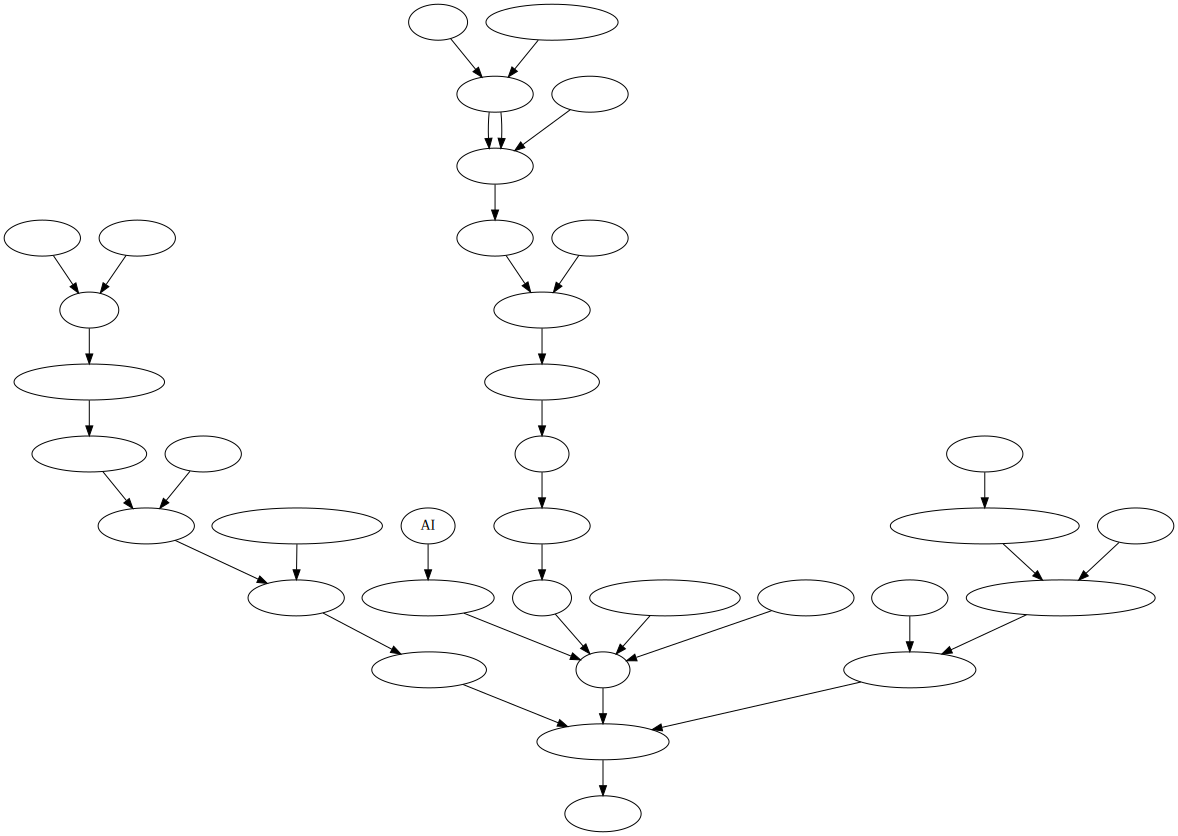

In [16]:
sentence=article_[1]
from graphviz import Digraph
dg = Digraph(format='png')
for chunk in sentence:
    dg.node(charchunk(chunk))
for chunk in sentence:
    if chunk.dst != -1:
        dg.edge(charchunk(chunk), charchunk(sentence[chunk.dst]))
dg

### 45

In [17]:
def getmorphParticle(chunk):
    morphCandidate = None
    for morph in chunk.morphs[::-1]:
        if morph.pos == "助詞":
            if morph.pos1 == "格助詞":
                return morph
            elif morphCandidate is None:
                morphCandidate=morph
    return morphCandidate

res=""
for sentence in article:
    for chunk in sentence:
        if "動詞" in [morph.pos for morph in chunk.morphs]:
            for morph in chunk.morphs:
                if morph.pos == "動詞":
                    verb=morph.base
                    break
            particles=[]
            for src in chunk.srcs:
                morph=getmorphParticle(sentence[src])
                if morph is not None:
                    particles.append(morph.base)
            if particles !=[]:
                res+=f"{verb}\t"
                particles.sort()
                for particle in particles:
                    res+=f"{particle} "
                res=res[:-1]
                res+="\n"
print(res)

用いる	を
する	て を
指す	を
代わる	に を
行う	て に
する	と
述べる	で に は
する	で を
する	を
する	を
する	て を
ある	が は
する	で に により
用いる	を
する	と を
使う	で でも
呼ぶ	も
ある	て も
する	を
出す	が に
する	に を
呼ぶ	と
持つ	が に
なる	が と
する	が が は
知る	として も
ある	が て に は
集める	が を
行う	に を を
ある	も
する	に を
する	において
超える	を
する	て に
行く	て により
する	にかけて を
破る	も
する	が として に
なる	で と など
呼ぶ	と は
ある	が
繰り返す	を
する	と を
基づく	に
する	と
ある	が て として
する	を
作る	を
なす	も
する	て で に を を を通して
上回る	で を
出す	を
行う	が て で に
でる	が
する	て て で で
だす	が で を
加える	に
見せる	て て において は を
広がる	が に は
行う	を
始まる	て て も
する	と
なる	が が と
する	が と
する	は を
行う	は を
する	を
もたらす	に は を
する	に
題する	と
する	に は を
築く	を
なる	に
出る	が と に関して
作り出す	で は を
する	は を
する	を
する	として は を
する	を
行う	を
行う	に
する	として において
する	として
示す	で に は を
する	を
示す	て は を
する	は を
する	は を
示す	を
呼ぶ	と
ある	は も
する	に を
する	を
使う	に によって は
する	が に に を
上げる	が で は を
する	に
する	に は を
打つ	に を
敗れる	が で に に は
する	において を
使う	のに を
省く	によって
上回る	が を
する	は を
する	が に
する	で も
する	が が に
する	が に
適す	に
する	から に対して を
行う	を
する	が が
行う	に に により を
する	が
する	に を
行う	て に を
する	に を
する	を
含む	に も
分かる	から が
する	が に
見合う	に
見出せる	が
する	から が にとって は も
する	が に において
進む	が
する	に につれて
する	を
至る	に
す

In [18]:
with open("src/aicase.txt",mode='w') as f:
    f.write(res)

`sort aicase.txt | uniq --count | sort --numeric-sort  --reverse|head -n10`
```
     51 する    を
     19 する    と
     18 する    が
     17 する    に
     12 する    は を
     11 よる    に
      8 行う    を
      6 基づく  に
      6 呼ぶ    と
      6 する    を に
```

`sort aicase.txt | grep "^する\s" |uniq --count | sort --numeric-sort  --reverse|head -n10`
```
     51 する    を
     19 する    と
     18 する    が
     17 する    に
     12 する    は を
      6 する    を に
      6 する    は と
      5 する    を で
      5 する    に を
      5 する    が を
```
```
      3 なる    は に
      3 なる    が と
      2 なる    に
      2 なる    と
      1 なる    も
      1 なる    は は
      1 なる    に も
      1 なる    に で に
      1 なる    に が に
      1 なる    で は
```
```
      2 与える  が に
      1 与える  は に を
```

### 46

In [59]:
from collections import defaultdict
aiCaboCha=aitxt
article=[]
for sentence in aiCaboCha.split(sep="EOS\n"):
    if sentence == "":
        continue
    chunkPattern=re.compile(r"^\* (.+?) (.+?)D (?:.+?) (?:.+?)\n(.+?)(?=\n\* |\n$)",re.MULTILINE + re.DOTALL)
    aiChunks=chunkPattern.findall(sentence)

    srcs = defaultdict(list)
    dst=[]
    morphsets=[]
    for chunk in aiChunks:
        dst.append(int(chunk[1]))
        srcs[int(chunk[1])].append(int(chunk[0]))
        morphPattern=re.compile(r"^(.*?)\t(.*?),(.*?)(?:,.*?){4},(.*?)(?:,.*?)*$",re.MULTILINE + re.DOTALL)
        aimorphs=morphPattern.findall(chunk[2])
        morphs=[]
        for np in aimorphs:
            term={"surface":np[0],
                  "base":np[3],
                  "pos":np[1],
                  "pos1":np[2],
                 }
            morph=Morph(term)
            morphs.append(morph)
        morphsets.append(morphs)
    if -1 in srcs:
        del(srcs[-1])
    aisentence=[]
    for i in range(len(dst)):
        aisentence.append(Chunk({"srcs":dict(srcs)[i] if i in srcs else [],"dst":dst[i],"morphs":morphsets[i]}))
    if aisentence!= []:
        article.append(aisentence)
article_=article[:5]
for sentence in article_:
    for i,chunk in enumerate(sentence):
        print(f"[{i}]",chunk)

[0] -1 []
人工　　　　 人工　　　　 名詞　　　　 一般　　　　　　　　　　　
知能　　　　 知能　　　　 名詞　　　　 一般　　　　　　　　　　　

[0] 17 []
人工　　　　 人工　　　　 名詞　　　　 一般　　　　　　　　　　　
知能　　　　 知能　　　　 名詞　　　　 一般　　　　　　　　　　　

[1] 17 []
（　　　　　 （　　　　　 記号　　　　 括弧開　　　　　　　　　　
じん　　　　 じん　　　　 名詞　　　　 一般　　　　　　　　　　　
こうち　　　 こうち　　　 名詞　　　　 一般　　　　　　　　　　　
のう　　　　 のう　　　　 助詞　　　　 終助詞　　　　　　　　　　
、　　　　　 、　　　　　 記号　　　　 読点　　　　　　　　　　　

[2] 3 []
AI　　　　 *　　　　　 名詞　　　　 一般　　　　　　　　　　　

[3] 17 [2]
〈　　　　　 〈　　　　　 記号　　　　 括弧開　　　　　　　　　　
エーアイ　　 *　　　　　 名詞　　　　 固有名詞　　　　　　　　　
〉　　　　　 〉　　　　　 記号　　　　 括弧閉　　　　　　　　　　
）　　　　　 ）　　　　　 記号　　　　 括弧閉　　　　　　　　　　
と　　　　　 と　　　　　 助詞　　　　 格助詞　　　　　　　　　　
は　　　　　 は　　　　　 助詞　　　　 係助詞　　　　　　　　　　
、　　　　　 、　　　　　 記号　　　　 読点　　　　　　　　　　　

[4] 5 []
「　　　　　 「　　　　　 記号　　　　 括弧開　　　　　　　　　　
『　　　　　 『　　　　　 記号　　　　 括弧開　　　　　　　　　　
計算　　　　 計算　　　　 名詞　　　　 サ変接続　　　　　　　　　

[5] 9 [4]
（　　　　　 （　　　　　 記号　　　　 括弧開　　　　　　　　　　
）　　　　　 ）　　　　　 記号　　　　 括弧閉　　　　　　　　　　
』　　　　　 』　　　　　 記号　　　　 括弧閉　　　　　　　　　　
という　　　 という　　　 助詞　　　　 格助詞　　　　　　　　　　

[6] 9 []
概念　　　　 概念　　　　 名詞　　　　 一般　　　　　　　　　　　
と　　　　　 と　　　　　 助詞　　　　 並立助詞　　　　　　　　　

[7] 

In [60]:
def getmorphParticle(chunk):
    morphCandidate = None
    for morph in chunk.morphs[::-1]:
        if morph.pos == "助詞":
            if morph.pos1 == "格助詞":
                return morph
            elif morphCandidate is None:
                morphCandidate=morph
    return morphCandidate

res=""
for sentence in article:
    for chunk in sentence:
        if "動詞" in [morph.pos for morph in chunk.morphs]:
            for morph in chunk.morphs:
                if morph.pos == "動詞":
                    verb=morph.base
                    break
            particles=[]
            for src in chunk.srcs:
                morph=getmorphParticle(sentence[src])
                if morph is not None:
                    particles.append((morph.base,sentence[src]))
            if particles !=[]:
                res+=f"{verb}\t"
                particles.sort(key=lambda x:x[0])
                for particle,chunk in particles:
                    res+=f"{particle} "
                res+="\t"
                for particle,chunk in particles:
                    res+=f"{charchunk(chunk)} "
                res=res[:-1]
                res+="\n"
print(res)

用いる	を 	道具を
する	て を 	用いて 知能を
指す	を 	一分野を
代わる	に を 	人間に 知的行動を
行う	て に 	代わって コンピューターに
する	と 	研究分野とも
述べる	で に は 	解説で 次のように 佐藤理史は
する	で を 	コンピュータ上で 知的能力を
する	を 	推論判断を
する	を 	画像データを
する	て を 	解析して パターンを
ある	が は 	画像認識等が 応用例は
する	で に により 	ダートマス会議で 1956年に ジョンマッカーシーにより
用いる	を 	記号処理を
する	と を 	主体と 記述を
使う	で でも 	現在では 意味あいでも
呼ぶ	も 	思考ルーチンも
ある	て も 	使われている ことも
する	を 	カウンセラーを
出す	が に 	人工無脳が 引き合いに
する	に を 	計算機に 役割を
呼ぶ	と 	エキスパートシステムと
持つ	が に 	人間が 暗黙に
なる	が と 	記述が 問題と
する	が が は 	出されるが 利用が 実現は
知る	として も 	アプローチとしては アプローチも
ある	が て に は 	知られているが 困難視されている 記号的明示性に 差は
集める	が を 	サポートベクターマシンが 注目を
行う	に を を 	元に 経験を 学習を
ある	も 	手法も
する	に を 	機械的に 知性を
する	において 	宇宙において
超える	を 	流行を
する	て に 	超えて 社会に
行く	て により 	浸透して 登場により
する	にかけて を 	2017年にかけて ディープラーニングを
破る	も 	プレイヤーも
する	が として に 	MicrosoftSuphx(SuperPhoenix)」が AIとして 十段に
なる	で と など 	麻雀では 最先端技術と 到達するなど
呼ぶ	と は 	機械学習と 人工知能は
ある	が 	ものが
繰り返す	を 	学習を
する	と を 	基本と ことを
基づく	に 	経験に
する	と 	ソフトコンピューティングと
ある	が て として 	ものが 関係している 手法としては
する	を 	これらを
作る	を 	知的システムを
なす	も 	試みも
する	て で に を を を通して 	なされている ACT-Rでは 元に 推論ルールを 統計的学習を 生成規則を通し

### 47

In [58]:
def getmorphParticle(chunk):
    morphCandidate = None
    for morph in chunk.morphs[::-1]:
        if morph.pos == "助詞":
            if morph.pos1 == "格助詞":
                return morph
            elif morphCandidate is None:
                morphCandidate=morph
    return morphCandidate

res=""
for sentence in article:
    for chunk in sentence:
        if "動詞" in [morph.pos for morph in chunk.morphs]:
            for morph in chunk.morphs:
                if morph.pos == "動詞":
                    verb=morph
                    break
            particles=[]
            for src in chunk.srcs:
                morph=getmorphParticle(sentence[src])
                if morph is not None:
                    particles.append((morph,sentence[src]))
            if particles !=[] and "を" in [particle.surface for particle,_ in particles]:
#                 particles.sort(key=lambda x:x[0].base)
                sahen=""
                particle1=""
                particle2=""
                for particle,chunk in particles:
                    isSahen=False
                    for i,morph in enumerate(chunk.morphs):
                        if i < len(chunk.morphs) -1 and chunk.morphs[i].pos1 =="サ変接続" and chunk.morphs[i+1].surface =="を":
                            isSahen=True
                            sahen+=f"{charchunk(chunk)} "
                    if not isSahen:
                        particle1+=f"{particle.base} "
                        particle2+=f"{charchunk(chunk)} "
                            
                if sahen == "":
                    continue
                res+=sahen[:-1]
                res+=f"{verb.base}\t"
                if particle1 =="":
                    res=res[:-1]+"\n"
                    continue
                res+=particle1[:-1]
                res+="\t"
                res+=particle2[:-1]
                res+="\n"
print(res)

知的行動を代わる	に	人間に
推論判断をする
記号処理を用いる
記述をする	と	主体と
注目を集める	が	サポートベクターマシンが
経験を 学習を行う	に	元に
流行を超える
学習を繰り返す
統計的学習をする	て で を に を通して	なされている ACT-Rでは 推論ルールを 元に 生成規則を通して
進化を見せる	て は て において	活躍している 敵対的生成ネットワークは 加えて 生成技術において
コンテンツ生成を行う
開発を行う	は	エイダ・ラブレスは
テストをする
処理を行う
知的処理を行う	に により に	同年に ティム・バーナーズリーにより Webに
意味をする	に	データに
知的処理を行う	て に	付加して コンピュータに
研究を進める	て	費やして
命令をする	で	機構で
運転をする	に	元に
特許をする	に が	2018年までに 日本が
研究をする
運転をする	て に	基づいて 柔軟に
注目を集める	から は	ことから ファジィは
ニューロファジィ制御をする
成功を受ける
知的制御を用いる	て も	受けて 他社も
制御をする	から	少なさから
知的制御をする
進歩を担う
精度改善を果たす	に で が	2012年に 画像処理コンテストで チームが
専用プログラムを使う
研究を続ける	が て	ジェフホーキンスが 向けて
記号接地問題(シンボルグラウンディング問題)をする	に	8月には
注目を集める	に	急速に
普及を受ける
機械学習を組み合わせる
投資を行う	に で	全世界的に 民間企業主導で
探索を行う	で	無報酬で
推論をする	て	経て
共同研究を始める	は とも	Googleは マックスプランク研究所とも
研究を行う	て	始めており
研究開発をする	で で	中国では 官民一体で
実験をする
研究開発をする	で	日本で
投資をする	は に	韓国は 2022年までに
深層学習をする
脳シミュレーションを行う
反乱を起こす	て に対して	於いて 人間に対して
弾圧を併せ持つ
監視を行う	まで に	歩行者まで 人工知能に
法的手続きを経る	を	ウイグル族を
差別を認める
研究をする
展開を変える
戦争をする
ファジィ制御をする	は	AIプログラムは
判断を介す	から	観点から
禁止を求める	に が	4月には ヒューマン・ライツ・ウォッチが
運用をめぐる


ごちゃごちゃコードを書いてしまった弊害がここで…

### 48

In [46]:
def getPath(chunk):
    paths=[]
    if chunk.hasPos("名詞"):
        path=chunk
        paths.append(path)
        while path.dst != -1:
            path=sentence[path.dst]
            paths.append(path)
    return paths

In [48]:
for sentence in article:
    for chunk in sentence:
        paths=getPath(chunk)
        if paths !=[]:
            print(" -> ".join([path.strMorphs() for path in paths]))

人工知能
人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
一分野を -> 指す -> 語 -> 研究分野とも -> される
語 -> 研究分野とも -> される
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または 

ネット検閲と -> 官僚や -> 刑務所の -> 囚人から -> 歩行者まで -> 行わせ -> 搭載するなど -> 監視社会管理社会化が -> 行われている -> 予防拘禁していると -> する -> 中国政府の -> 内部文書であるが -> 報じられており -> なっている -> 破壊された -> 懸念されている
官僚や -> 刑務所の -> 囚人から -> 歩行者まで -> 行わせ -> 搭載するなど -> 監視社会管理社会化が -> 行われている -> 予防拘禁していると -> する -> 中国政府の -> 内部文書であるが -> 報じられており -> なっている -> 破壊された -> 懸念されている
刑務所の -> 囚人から -> 歩行者まで -> 行わせ -> 搭載するなど -> 監視社会管理社会化が -> 行われている -> 予防拘禁していると -> する -> 中国政府の -> 内部文書であるが -> 報じられており -> なっている -> 破壊された -> 懸念されている
囚人から -> 歩行者まで -> 行わせ -> 搭載するなど -> 監視社会管理社会化が -> 行われている -> 予防拘禁していると -> する -> 中国政府の -> 内部文書であるが -> 報じられており -> なっている -> 破壊された -> 懸念されている
横断歩道の -> 歩行者まで -> 行わせ -> 搭載するなど -> 監視社会管理社会化が -> 行われている -> 予防拘禁していると -> する -> 中国政府の -> 内部文書であるが -> 報じられており -> なっている -> 破壊された -> 懸念されている
歩行者まで -> 行わせ -> 搭載するなど -> 監視社会管理社会化が -> 行われている -> 予防拘禁していると -> する -> 中国政府の -> 内部文書であるが -> 報じられており -> なっている -> 破壊された -> 懸念されている
監視を -> 行わせ -> 搭載するなど -> 監視社会管理社会化が -> 行われている -> 予防拘禁していると -> する -> 中国政府の -> 内部文書であるが -> 報じられており -> なっている -> 破壊された -> 懸念されている
人工知能に -> 行わせ -> 搭載するなど -

### 49

In [65]:
from collections import defaultdict
aiCaboCha=jinko
article=[]
for sentence in aiCaboCha.split(sep="EOS\n"):
    if sentence == "":
        continue
    chunkPattern=re.compile(r"^\* (.+?) (.+?)D (?:.+?) (?:.+?)\n(.+?)(?=\n\* |\n$)",re.MULTILINE + re.DOTALL)
    aiChunks=chunkPattern.findall(sentence)

    srcs = defaultdict(list)
    dst=[]
    morphsets=[]
    for chunk in aiChunks:
        dst.append(int(chunk[1]))
        srcs[int(chunk[1])].append(int(chunk[0]))
        morphPattern=re.compile(r"^(.*?)\t(.*?),(.*?)(?:,.*?){4},(.*?)(?:,.*?)*$",re.MULTILINE + re.DOTALL)
        aimorphs=morphPattern.findall(chunk[2])
        morphs=[]
        for np in aimorphs:
            term={"surface":np[0],
                  "base":np[3],
                  "pos":np[1],
                  "pos1":np[2],
                 }
            morph=Morph(term)
            morphs.append(morph)
        morphsets.append(morphs)
    if -1 in srcs:
        del(srcs[-1])
    aisentence=[]
    for i in range(len(dst)):
        aisentence.append(Chunk({"srcs":dict(srcs)[i] if i in srcs else [],"dst":dst[i],"morphs":morphsets[i]}))
    if aisentence!= []:
        article.append(aisentence)
article_=article[:5]
for sentence in article_:
    for i,chunk in enumerate(sentence):
        print(f"[{i}]",chunk)

[0] 6 []
ジョン　　　 ジョン　　　 名詞　　　　 固有名詞　　　　　　　　　
・　　　　　 ・　　　　　 記号　　　　 一般　　　　　　　　　　　
マッカーシー マッカーシー 名詞　　　　 固有名詞　　　　　　　　　
は　　　　　 は　　　　　 助詞　　　　 係助詞　　　　　　　　　　

[1] 2 []
AI　　　　 *　　　　　 名詞　　　　 一般　　　　　　　　　　　
に関する　　 に関する　　 助詞　　　　 格助詞　　　　　　　　　　

[2] 3 [1]
最初　　　　 最初　　　　 名詞　　　　 一般　　　　　　　　　　　
の　　　　　 の　　　　　 助詞　　　　 連体化　　　　　　　　　　

[3] 6 [2]
会議　　　　 会議　　　　 名詞　　　　 サ変接続　　　　　　　　　
で　　　　　 で　　　　　 助詞　　　　 格助詞　　　　　　　　　　

[4] 5 []
人工　　　　 人工　　　　 名詞　　　　 一般　　　　　　　　　　　
知能　　　　 知能　　　　 名詞　　　　 一般　　　　　　　　　　　
という　　　 という　　　 助詞　　　　 格助詞　　　　　　　　　　

[5] 6 [4]
用語　　　　 用語　　　　 名詞　　　　 一般　　　　　　　　　　　
を　　　　　 を　　　　　 助詞　　　　 格助詞　　　　　　　　　　

[6] -1 [0, 3, 5]
作り出し　　 作り出す　　 動詞　　　　 自立　　　　　　　　　　　
た　　　　　 た　　　　　 助動詞　　　 *　　　　　　　　　　　　
。　　　　　 。　　　　　 記号　　　　 句点　　　　　　　　　　　



In [66]:
paths=[]
for chunk in sentence:
    path=getPath(chunk)
    if path !=[]:
        print(" -> ".join([chunk.strMorphs() for chunk in path]))
        paths.append(path)

ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出した


In [61]:
def strMorphsVariable(chunk, variable):
    l=""
    nounhead=-1
    nountail=-1
    for idx,morph in enumerate(chunk.morphs):
        if nounhead == -1 and morph.pos =="名詞":
            nounhead=idx
        if  morph.pos == "名詞":
            nountail=idx
    for idx,morph in enumerate(chunk.morphs):
        if morph.pos != "記号":
            if idx>nounhead and idx<=nountail:
                continue
            elif idx == nounhead:
                l+=variable
            else:
                l+=morph.surface
    return l

In [67]:
for i,path1 in enumerate(paths):
    for j,path2 in enumerate(paths[i+1:],i+1):
        root=""
        for chunk in path1:
            if root == "":
                root+=strMorphsVariable(chunk,"X")
            elif chunk == path2[0]:
                root+= " -> "
                root+=strMorphsVariable(chunk,"Y")
                break
            elif chunk.dst ==-1:
                root+= " | "
                root+=strMorphsVariable(path2[0],"Y")
                root+= " -> "
                root+= " -> ".join([path.strMorphs() for path in path2[1:-1]])
                root+= " | "
                root+= path1[-1].strMorphs()
            else:
                root+= " -> "
                root+=chunk.strMorphs()
        print(root)

Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで ->  | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを ->  | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを ->  | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを ->  | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを ->  | 作り出した
Xという -> Yを
